## CS5001 Final Project
hc5hq, Huilin Chang, Gladies

 ## Language model - Auto complete
 ## N-gram model application on auto-complete

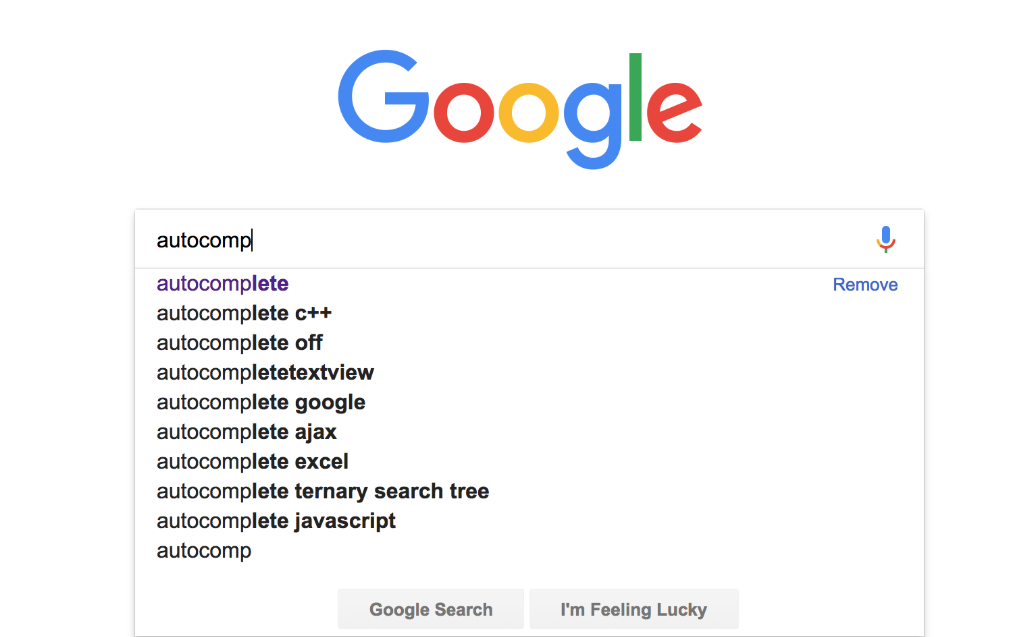

<br> Process text corpus to N-gram language model
<br> Handle out of vocabulary words
<br> Smoothing for previously unseen N-grams
<br> Language model evaluation

In [57]:
import math
import random
import numpy as np
import pandas as pd
import nltk
nltk.data.path.append('.')

In [10]:
with open('en_US.news.txt', encoding="utf8") as file:
    data = file.read()
print("Data type:", type(data))
print("Number of letters:", len(data))
print("First 300 letters of the data")
print("-------")
display(data[0:300])
print("-------")

print("Last 300 letters of the data")
print("-------")
display(data[-300:])
print("-------")

Data type: <class 'str'>
Number of letters: 204233401
First 300 letters of the data
-------


"He wasn't home alone, apparently.\nThe St. Louis plant had to close. It would die of old age. Workers had been making cars there since the onset of mass automotive production in the 1920s.\nWSU's plans quickly became a hot topic on local online sites. Though most people applauded plans for the new bio"

-------
Last 300 letters of the data
-------


'About Because He Doesn\'t Play in New York, LA or the Pacific Northwest" in goalkeeper Dan Kennedy. These will be tough points.\nThe only outwardly religious adornment was a billboard-sized banner with an image of Our Lady of Charity, patron saint of Cuba, hanging on the side of the National Library.\n'

-------


In [11]:
def split_to_sentences(data):

    sentences = data.split('\n')
    
    # Additional clearning (This part is already implemented)
    # - Remove leading and trailing spaces from each sentence
    # - Drop sentences if they are empty strings.
    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 0]
    
    return sentences

In [12]:
x = """
I have a pen.\nI have an apple. \nAh\nApple pen.\n
"""
print(x)

split_to_sentences(x)


I have a pen.
I have an apple. 
Ah
Apple pen.




['I have a pen.', 'I have an apple.', 'Ah', 'Apple pen.']

In [13]:
def tokenize_sentences(sentences):

    # Initialize the list of lists of tokenized sentences
    tokenized_sentences = []
    
    # Go through each sentence
    for sentence in sentences:
        
        # Convert to lowercase letters
        sentence = sentence.lower()
        
        # Convert into a list of words
        tokenized = nltk.word_tokenize(sentence)
        
        # append the list of words to the list of lists
        tokenized_sentences.append(tokenized)
    
    
    return tokenized_sentences

In [15]:
def get_tokenized_data(data):

    # Get the sentences by splitting up the data
    sentences = split_to_sentences(data)
    
    # Get the list of lists of tokens by tokenizing the sentences
    tokenized_sentences = tokenize_sentences(sentences)

    
    return tokenized_sentences

In [17]:
tokenized_data = get_tokenized_data(data)
random.seed(314)
random.shuffle(tokenized_data)

train_size = int(len(tokenized_data) * 0.8)
train_data = tokenized_data[0:train_size]
test_data = tokenized_data[train_size:]

In [18]:
print("{} data are split into {} train and {} test set".format(
    len(tokenized_data), len(train_data), len(test_data)))

print("First training sample:")
print(train_data[0])
      
print("First test sample")
print(test_data[0])

1010242 data are split into 808193 train and 202049 test set
First training sample:
['depaul', 'learned', 'that', 'he', 'had', 'practiced', 'at', 'st.', 'anthony', "'s", ',', 'according', 'to', 'the', 'board', '.']
First test sample
['he', 'remembers', '``', 'landscapes', 'of', 'rubble', ',', "''", 'bombed-out', 'streets', 'and', 'beatings', 'in', 'the', 'schoolyard', '.', 'his', 'father', ',', 'a', 'foreman', 'at', 'general', 'electric', ',', 'was', 'often', 'away', '.', 'but', 'richards', 'was', 'close', 'to', 'his', 'mother', 'and', 'adored', 'his', 'grandfather', ',', 'gus', 'dupree', ',', 'a', 'musician', 'who', 'harmonized', 'with', 'keith', 'on', 'radio', 'songs', 'and', 'taught', 'him', 'a', 'few', 'chords', 'on', 'guitar', '.', 'one', 'of', 'the', 'great', 'discoveries', 'of', 'working', 'on', '``', 'life', "''", 'was', 'remembering', 'his', 'grandfather', 'and', '``', 'how', 'much', 'in', 'his', 'own', 'way', 'he', 'had', 'to', 'do', 'with', 'what', 'i', 'became', ',', 'how',

In [19]:
def count_words(tokenized_sentences):

        
    word_counts = {}
    
    # Loop through each sentence
    for sentence in tokenized_sentences: # complete this line
        
        # Go through each token in the sentence
        for token in sentence: # complete this line

            # If the token is not in the dictionary yet, set the count to 1
            if token not in word_counts.keys(): # complete this line
                word_counts[token] = 1
            
            # If the token is already in the dictionary, increment the count by 1
            else:
                word_counts[token] += 1

    
    return word_counts

In [21]:
def get_words_with_nplus_frequency(tokenized_sentences, count_threshold):

    # Initialize an empty list to contain the words that
    # appear at least 'minimum_freq' times.
    closed_vocab = []
    
    # Get the word couts of the tokenized sentences
    # Use the function that you defined earlier to count the words
    word_counts = count_words(tokenized_sentences)
    # for each word and its count
    for word, cnt in word_counts.items(): # complete this line
        
        # check that the word's count
        # is at least as great as the minimum count
        if cnt >= count_threshold:
            
            # append the word to the list
            closed_vocab.append(word)
    
    return closed_vocab

In [23]:
def replace_oov_words_by_unk(tokenized_sentences, vocabulary, unknown_token="<unk>"):
    
    # Place vocabulary into a set for faster search
    vocabulary = set(vocabulary)
    
    # Initialize a list that will hold the sentences
    # after less frequent words are replaced by the unknown token
    replaced_tokenized_sentences = []
    
    # Go through each sentence
    for sentence in tokenized_sentences:
        
        # Initialize the list that will contain
        # a single sentence with "unknown_token" replacements
        replaced_sentence = []

        # for each token in the sentence
        for token in sentence: # complete this line
            
            # Check if the token is in the closed vocabulary
            if token in vocabulary: # complete this line
                # If so, append the word to the replaced_sentence
                replaced_sentence.append(token)
            else:
                # otherwise, append the unknown token instead
                replaced_sentence.append(unknown_token)
        
        # Append the list of tokens to the list of lists
        replaced_tokenized_sentences.append(replaced_sentence)
        
    return replaced_tokenized_sentences

In [25]:
def preprocess_data(train_data, test_data, count_threshold):
    
    # Get the closed vocabulary using the train data
    vocabulary = get_words_with_nplus_frequency(train_data,count_threshold)
    
    # For the train data, replace less common words with "<unk>"
    train_data_replaced = replace_oov_words_by_unk(train_data,vocabulary)
    
    # For the test data, replace less common words with "<unk>"
    test_data_replaced = replace_oov_words_by_unk(test_data,vocabulary)
    

    return train_data_replaced, test_data_replaced, vocabulary

In [27]:
minimum_freq = 2
train_data_processed, test_data_processed, vocabulary = preprocess_data(train_data, 
                                                                        test_data, 
                                                                        minimum_freq)

In [28]:
print("First preprocessed training sample:")
print(train_data_processed[0])
print()
print("First preprocessed test sample:")
print(test_data_processed[0])
print()
print("First 10 vocabulary:")
print(vocabulary[0:10])
print()
print("Size of vocabulary:", len(vocabulary))

First preprocessed training sample:
['depaul', 'learned', 'that', 'he', 'had', 'practiced', 'at', 'st.', 'anthony', "'s", ',', 'according', 'to', 'the', 'board', '.']

First preprocessed test sample:
['he', 'remembers', '``', 'landscapes', 'of', 'rubble', ',', "''", 'bombed-out', 'streets', 'and', 'beatings', 'in', 'the', 'schoolyard', '.', 'his', 'father', ',', 'a', 'foreman', 'at', 'general', 'electric', ',', 'was', 'often', 'away', '.', 'but', 'richards', 'was', 'close', 'to', 'his', 'mother', 'and', 'adored', 'his', 'grandfather', ',', 'gus', 'dupree', ',', 'a', 'musician', 'who', 'harmonized', 'with', 'keith', 'on', 'radio', 'songs', 'and', 'taught', 'him', 'a', 'few', 'chords', 'on', 'guitar', '.', 'one', 'of', 'the', 'great', 'discoveries', 'of', 'working', 'on', '``', 'life', "''", 'was', 'remembering', 'his', 'grandfather', 'and', '``', 'how', 'much', 'in', 'his', 'own', 'way', 'he', 'had', 'to', 'do', 'with', 'what', 'i', 'became', ',', 'how', 'much', 'i', 'learned', 'from', 

In [ ]:
## n-gram based language models

In [29]:
def count_n_grams(data, n, start_token='<s>', end_token = '<e>'):
    
    # Initialize dictionary of n-grams and their counts
    n_grams = {}
    
    # Go through each sentence in the data
    for sentence in data: # complete this line
        
        # prepend start token n times, and  append <e> one time
        sentence = [start_token] * n+ sentence + [end_token]
        # convert list to tuple
        # So that the sequence of words can be used as
        # a key in the dictionary
        sentence = tuple(sentence)
        
        # Use 'i' to indicate the start of the n-gram
        # from index 0
        # to the last index where the end of the n-gram
        # is within the sentence.
        
        m = len(sentence) if n==1 else len(sentence)-1
        for i in range(m): # complete this line
        
            # Get the n-gram from i to i+n
            n_gram = sentence[i:i+n]
            
            # check if the n-gram is in the dictionary
            if n_gram in n_grams.keys(): # complete this line
            
                # Increment the count for this n-gram
                n_grams[n_gram] += 1
            else:
                # Initialize this n-gram count to 1
                n_grams[n_gram] = 1
    return n_grams

In [32]:
def estimate_probability(word, previous_n_gram, 
                         n_gram_counts, n_plus1_gram_counts, vocabulary_size, k=1.0):

    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram) 
    
    
    previous_n_gram_count = n_gram_counts[previous_n_gram] if previous_n_gram in n_gram_counts  else 0
    
    # Calculate the denominator using the count of the previous n gram
    # and apply k-smoothing
    denominator = previous_n_gram_count + k * vocabulary_size
    
    # Define n plus 1 gram as the previous n-gram plus the current word as a tuple
    n_plus1_gram = previous_n_gram + (word,)

    # Set the count to the count in the dictionary,
    # otherwise 0 if not in the dictionary
    # use the dictionary that has counts for the n-gram plus current word
    n_plus1_gram_count = n_plus1_gram_counts[n_plus1_gram] if n_plus1_gram in n_plus1_gram_counts  else 0
    
    # Define the numerator use the count of the n-gram plus current word,
    # and apply smoothing
    numerator = n_plus1_gram_count + k
    
    # Calculate the probability as the numerator divided by denominator
    probability = numerator / denominator
    
    
    return probability

In [33]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)

bigram_counts = count_n_grams(sentences, 2)

tmp_prob = estimate_probability("cat", "a", unigram_counts, bigram_counts, len(unique_words), k=1)

print(f"The estimated probability of word 'cat' given the previous n-gram 'a' is: {tmp_prob:.4f}")

The estimated probability of word 'cat' given the previous n-gram 'a' is: 0.3333


In [34]:
def estimate_probabilities(previous_n_gram, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0):
    
    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)
    
    # add <e> <unk> to the vocabulary
    # <s> is not needed since it should not appear as the next word
    vocabulary = vocabulary + ["<e>", "<unk>"]
    vocabulary_size = len(vocabulary)
    
    probabilities = {}
    for word in vocabulary:
        probability = estimate_probability(word, previous_n_gram, 
                                           n_gram_counts, n_plus1_gram_counts, 
                                           vocabulary_size, k=k)
        probabilities[word] = probability

    return probabilities

In [35]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
estimate_probabilities("a", unigram_counts, bigram_counts, unique_words, k=1)

{'this': 0.09090909090909091,
 'dog': 0.09090909090909091,
 'i': 0.09090909090909091,
 'a': 0.09090909090909091,
 'cat': 0.2727272727272727,
 'like': 0.09090909090909091,
 'is': 0.09090909090909091,
 '<e>': 0.09090909090909091,
 '<unk>': 0.09090909090909091}

In [36]:
trigram_counts = count_n_grams(sentences, 3)
estimate_probabilities(["<s>", "<s>"], bigram_counts, trigram_counts, unique_words, k=1)

{'this': 0.18181818181818182,
 'dog': 0.09090909090909091,
 'i': 0.18181818181818182,
 'a': 0.09090909090909091,
 'cat': 0.09090909090909091,
 'like': 0.09090909090909091,
 'is': 0.09090909090909091,
 '<e>': 0.09090909090909091,
 '<unk>': 0.09090909090909091}

In [37]:
def make_count_matrix(n_plus1_gram_counts, vocabulary):
    # add <e> <unk> to the vocabulary
    # <s> is omitted since it should not appear as the next word
    vocabulary = vocabulary + ["<e>", "<unk>"]
    
    # obtain unique n-grams
    n_grams = []
    for n_plus1_gram in n_plus1_gram_counts.keys():
        n_gram = n_plus1_gram[0:-1]
        n_grams.append(n_gram)
    n_grams = list(set(n_grams))
    
    # mapping from n-gram to row
    row_index = {n_gram:i for i, n_gram in enumerate(n_grams)}
    # mapping from next word to column
    col_index = {word:j for j, word in enumerate(vocabulary)}
    
    nrow = len(n_grams)
    ncol = len(vocabulary)
    count_matrix = np.zeros((nrow, ncol))
    for n_plus1_gram, count in n_plus1_gram_counts.items():
        n_gram = n_plus1_gram[0:-1]
        word = n_plus1_gram[-1]
        if word not in vocabulary:
            continue
        i = row_index[n_gram]
        j = col_index[word]
        count_matrix[i, j] = count
    
    count_matrix = pd.DataFrame(count_matrix, index=n_grams, columns=vocabulary)
    return count_matrix

In [38]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)

print('bigram counts')
display(make_count_matrix(bigram_counts, unique_words))

bigram counts


,this,dog,i,a,cat,like,is,<e>,<unk>
"(like,)",0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
"(i,)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(this,)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(is,)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(dog,)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(a,)",0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
"(<s>,)",1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(cat,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [39]:
# Show trigram counts
print('\ntrigram counts')
trigram_counts = count_n_grams(sentences, 3)
display(make_count_matrix(trigram_counts, unique_words))


trigram counts


,this,dog,i,a,cat,like,is,<e>,<unk>
"(i, like)",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"(like, a)",0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
"(<s>, i)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(dog, is)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(is, like)",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"(<s>, <s>)",1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(a, cat)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
"(this, dog)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(<s>, this)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(cat,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [40]:
def make_probability_matrix(n_plus1_gram_counts, vocabulary, k):
    count_matrix = make_count_matrix(n_plus1_gram_counts, unique_words)
    count_matrix += k
    prob_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    return prob_matrix

In [41]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)
print("bigram probabilities")
display(make_probability_matrix(bigram_counts, unique_words, k=1))

bigram probabilities


,this,dog,i,a,cat,like,is,<e>,<unk>
"(like,)",0.090909,0.090909,0.090909,0.272727,0.090909,0.090909,0.090909,0.090909,0.090909
"(i,)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(this,)",0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
"(is,)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(dog,)",0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000
"(a,)",0.090909,0.090909,0.090909,0.090909,0.272727,0.090909,0.090909,0.090909,0.090909
"(<s>,)",0.181818,0.090909,0.181818,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
"(cat,)",0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909


In [42]:
print("trigram probabilities")
trigram_counts = count_n_grams(sentences, 3)
display(make_probability_matrix(trigram_counts, unique_words, k=1))

trigram probabilities


,this,dog,i,a,cat,like,is,<e>,<unk>
"(i, like)",0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000
"(like, a)",0.090909,0.090909,0.090909,0.090909,0.272727,0.090909,0.090909,0.090909,0.090909
"(<s>, i)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(dog, is)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(is, like)",0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000
"(<s>, <s>)",0.181818,0.090909,0.181818,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
"(a, cat)",0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909
"(this, dog)",0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000
"(<s>, this)",0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
"(cat,)",0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909


In [43]:
def calculate_perplexity(sentence, n_gram_counts, n_plus1_gram_counts, vocabulary_size, k=1.0):

    # length of previous words
    n = len(list(n_gram_counts.keys())[0]) 
    
    # prepend <s> and append <e>
    sentence = ["<s>"] * n + sentence + ["<e>"]
    
    # Cast the sentence from a list to a tuple
    sentence = tuple(sentence)
    
    # length of sentence (after adding <s> and <e> tokens)
    N = len(sentence)
    
    # The variable p will hold the product
    # that is calculated inside the n-root
    # Update this in the code below
    product_pi = 1.0
    
    # Index t ranges from n to N - 1
    for t in range(n, N-1): # complete this line

        # get the n-gram preceding the word at position t
        n_gram = sentence[t-1]
        
        # get the word at position t
        word = sentence[t]
        
        # Estimate the probability of the word given the n-gram
        # using the n-gram counts, n-plus1-gram counts,
        # vocabulary size, and smoothing constant
        probability = estimate_probability(word,n_gram, n_gram_counts, n_plus1_gram_counts, len(unique_words), k=1)
        
        # Update the product of the probabilities
        # This 'product_pi' is a cumulative product 
        # of the (1/P) factors that are calculated in the loop
        product_pi *= 1 / probability

    # Take the Nth root of the product
    perplexity = product_pi**(1/float(N))
    
    return perplexity

In [44]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)


perplexity_train1 = calculate_perplexity(sentences[0],
                                         unigram_counts, bigram_counts,
                                         len(unique_words), k=1.0)
print(f"Perplexity for first train sample: {perplexity_train1:.4f}")

test_sentence = ['i', 'like', 'a', 'dog']
perplexity_test = calculate_perplexity(test_sentence,
                                       unigram_counts, bigram_counts,
                                       len(unique_words), k=1.0)
print(f"Perplexity for test sample: {perplexity_test:.4f}")

Perplexity for first train sample: 2.8944
Perplexity for test sample: 3.4760


In [45]:
def suggest_a_word(previous_tokens, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0, start_with=None):

    
    # length of previous words
    n = len(list(n_gram_counts.keys())[0]) 
    
    # From the words that the user already typed
    # get the most recent 'n' words as the previous n-gram
    previous_n_gram = previous_tokens[-n:]

    # Estimate the probabilities that each word in the vocabulary
    # is the next word,
    # given the previous n-gram, the dictionary of n-gram counts,
    # the dictionary of n plus 1 gram counts, and the smoothing constant
    probabilities = estimate_probabilities(previous_n_gram,
                                           n_gram_counts, n_plus1_gram_counts,
                                           vocabulary, k=k)
    
    # Initialize suggested word to None
    # This will be set to the word with highest probability
    suggestion = None
    
    # Initialize the highest word probability to 0
    # this will be set to the highest probability 
    # of all words to be suggested
    max_prob = 0
    
    
    # For each word and its probability in the probabilities dictionary:
    for word, prob in probabilities.items(): # complete this line
        
        # If the optional start_with string is set
        if start_with != None: # complete this line

            # Check if the word starts with the letters in 'start_with'
            if not word.startswith(start_with): # complete this line

                #If so, don't consider this word (move onto the next word)
                continue # complete this line
        
        # Check if this word's probability
        # is greater than the current maximum probability
        if prob > max_prob: # complete this line
            
            # If so, save this word as the best suggestion (so far)
            suggestion = word
            
            # Save the new maximum probability
            max_prob = prob

    
    return suggestion, max_prob

In [46]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)

previous_tokens = ["i", "like"]
tmp_suggest1 = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0)
print(f"The previous words are 'i like',\n\tand the suggested word is `{tmp_suggest1[0]}` with a probability of {tmp_suggest1[1]:.4f}")

print()
# test your code when setting the starts_with
tmp_starts_with = 'c'
tmp_suggest2 = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0, start_with=tmp_starts_with)
print(f"The previous words are 'i like', the suggestion must start with `{tmp_starts_with}`\n\tand the suggested word is `{tmp_suggest2[0]}` with a probability of {tmp_suggest2[1]:.4f}")

The previous words are 'i like',
	and the suggested word is `a` with a probability of 0.2727

The previous words are 'i like', the suggestion must start with `c`
	and the suggested word is `cat` with a probability of 0.0909


In [47]:
def get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with=None):
    model_counts = len(n_gram_counts_list)
    suggestions = []
    for i in range(model_counts-1):
        n_gram_counts = n_gram_counts_list[i]
        n_plus1_gram_counts = n_gram_counts_list[i+1]
        
        suggestion = suggest_a_word(previous_tokens, n_gram_counts,
                                    n_plus1_gram_counts, vocabulary,
                                    k=k, start_with=start_with)
        suggestions.append(suggestion)
    return suggestions

In [48]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
trigram_counts = count_n_grams(sentences, 3)
quadgram_counts = count_n_grams(sentences, 4)
qintgram_counts = count_n_grams(sentences, 5)

n_gram_counts_list = [unigram_counts, bigram_counts, trigram_counts, quadgram_counts, qintgram_counts]
previous_tokens = ["i", "like"]
tmp_suggest3 = get_suggestions(previous_tokens, n_gram_counts_list, unique_words, k=1.0)

print(f"The previous words are 'i like', the suggestions are:")
display(tmp_suggest3)

The previous words are 'i like', the suggestions are:


[('a', 0.2727272727272727),
 ('a', 0.2),
 ('this', 0.1111111111111111),
 ('this', 0.1111111111111111)]

In [49]:
n_gram_counts_list = []
for n in range(1, 6):
    print("Computing n-gram counts with n =", n, "...")
    n_model_counts = count_n_grams(train_data_processed, n)
    n_gram_counts_list.append(n_model_counts)

Computing n-gram counts with n = 1 ...
Computing n-gram counts with n = 2 ...
Computing n-gram counts with n = 3 ...
Computing n-gram counts with n = 4 ...
Computing n-gram counts with n = 5 ...


In [50]:
previous_tokens = ["i", "want", "to", "go"]
tmp_suggest5 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest5)

The previous words are ['i', 'want', 'to', 'go'], the suggestions are:


[('to', 0.0211940999470284),
 ('to', 0.006951171542467314),
 ('to', 0.00044599217986314763),
 ('to', 7.958128003428117e-05)]

In [52]:
previous_tokens = ["hey", "how", "are"]
tmp_suggest6 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest6)

The previous words are ['hey', 'how', 'are'], the suggestions are:


[('the', 0.013606988601305492),
 ('you', 0.00031208885353241746),
 ('depaul', 6.123886218194066e-06),
 ('depaul', 6.123886218194066e-06)]

In [53]:
previous_tokens = ["hey", "how", "are", "you"]
tmp_suggest7 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest7)

The previous words are ['hey', 'how', 'are', 'you'], the suggestions are:


[('can', 0.0292325136418397),
 ('going', 0.0006575662741564278),
 ('going', 9.795218708867734e-05),
 ('depaul', 6.123886218194066e-06)]

In [54]:
previous_tokens = ["hey", "how", "are", "you"]
tmp_suggest8 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with="d")

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest8)

The previous words are ['hey', 'how', 'are', 'you'], the suggestions are:


[('do', 0.013523728533295538),
 ('doing', 0.0003531374435284519),
 ('doing', 4.897609354433867e-05),
 ('depaul', 6.123886218194066e-06)]

In [55]:
previous_tokens = ["What", "is", "your"]
tmp_suggest8 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with="d")

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest8)

The previous words are ['What', 'is', 'your'], the suggestions are:


[('doctor', 0.0005406608784149095),
 ('dog', 2.444763621917306e-05),
 ('depaul', 6.123886218194066e-06),
 ('depaul', 6.123886218194066e-06)]

In [56]:
previous_tokens = ["My", "name", "is"]
tmp_suggest8 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with="d")

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest8)

The previous words are ['My', 'name', 'is'], the suggestions are:


[('doing', 0.0013092677452539044),
 ('david', 2.4451073402122352e-05),
 ('depaul', 6.123886218194066e-06),
 ('depaul', 6.123886218194066e-06)]